In [19]:
import numpy as np 
import matplotlib.pyplot as plt 

In [20]:
# system parameters
G = 6.67E-11
M_star = 0.2       #M_sol
M_planet = 9.55E-4 #M_sol Jupiter like mass
M_sol = 1.99E30
AU = 1.49E11 
a = 1                #AU Semi-major axis
r = 0.8              #AU min distance between star and planet

In [21]:
c = a - r
b = np.sqrt((a**2) - (c**2))
theta = 0
R_vec = np.array([a*np.cos(theta)-c,b*np.sin(theta),0]) #-c important to account for shift in origin
print(R_vec)

[0.8 0.  0. ]


In [22]:
# calculating V using Vis Viva equation since we know that this velocity will be perpendicular to the direction r.
phi = 0 #inclination
Vmax = np.sqrt(G*(M_star+M_planet)*M_sol * ((2)/(np.linalg.norm(R_vec)*AU) - (1)/(a*AU)))
V_vec = np.array([Vmax*np.sin(theta)*np.cos(phi),Vmax*np.cos(theta)*np.cos(phi),Vmax*np.sin(phi)])

In [23]:
print('V =',V_vec,'m/s')
print(np.linalg.norm(V_vec))

V = [    0.         16386.69455809     0.        ] m/s
16386.69455809403


In [24]:
# Calculating a (major semi-axis)
mu = M_star*M_sol*M_sol*M_planet/(M_planet*M_sol+M_star*M_sol)
Eb = 0.5*mu*np.linalg.norm(V_vec)**2  - (G*M_star*M_sol*M_planet*M_sol)/(np.linalg.norm(R_vec))
print(Eb)
a_calc = (G * M_star*M_sol * M_planet*M_sol) / (2*Eb)

-6.306310746224606e+46


In [25]:
print(a_calc)

-0.4000000000016108


In [26]:
#Calculating e given a systems, R and a.
e = np.sqrt((1-(np.linalg.norm(R_vec))/(abs(a)) )**2 + (np.dot(R_vec,V_vec)**2)/(abs(a)*G*(M_planet+M_star)*M_sol))
#e = np.sqrt((1-(r*AU)/(abs(a)))**2) 0.64 + ..
print(e)

0.19999999999999996


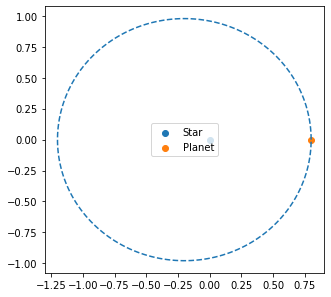

In [27]:
# plotting a ellipse with given a and b.
def ellipse(a,b,t):
    u = -c     #x-position of the center
    x = u + a*np.cos(t)
    y = b*np.sin(t)
    return x,y
t = np.linspace(0,2*np.pi, 200)
x,y = ellipse(a,b,t)
plt.figure(figsize=[5*a,5*b]) #figsize changes to appropriate deimensions.
plt.plot(x,y,linestyle='--')
plt.scatter(0,0,label='Star')
plt.scatter(R_vec[0],R_vec[1],label='Planet')
plt.legend()
plt.show()

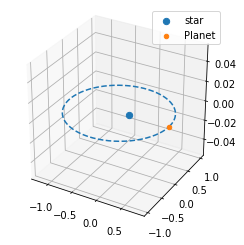

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(0,0,0,label='star',s=40)
ax.plot(x,y,0,linestyle='--')
ax.scatter(R_vec[0],R_vec[1],0,label='Planet')
ax.set_box_aspect([1*a,1*b,1]) #figsize changes to appropriate dimentions
plt.legend()
plt.show()